In [0]:
import pandas as pd
orders=pd.read_table("http://bit.ly/chiporders")
orders.head()
orders.item_name.str.upper()
orders[orders.item_name.str.contains("Chicken")]
orders.choice_description.str.replace('[\[\]]','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                     NaN
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                    NaN
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                    NaN
15                                                    NaN
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

In [0]:
user_cols=["id","age","gender","occupation","zip_code"]
pd.read_table("http://bit.ly/movieusers",sep=("|"),header=None,names=user_cols)
orders.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [0]:
ufo=pd.read_csv("http://bit.ly/uforeports")
ufo['City']
ufo.City
ufo["location"]=ufo.City+", "+ufo.State
ufo.City.isnull().sum()

In [0]:
ufo[ufo.City.isnull()]
ufo.shape

In [0]:
ufo.dropna(how="any").tail
ufo.dropna(subset=['City'],how='any').shape
ufo['Shape Reported'].value_counts()
ufo['Shape Reported'].fillna(value='various',inplace=True)
ufo['Shape Reported'].value_counts(dropna=False)


In [0]:
ufo.tail()

In [0]:
movies=pd.read_csv("http://bit.ly/imdbratings")
movies.head()
movies.title.sort_values( )
movies.sort_values("duration",ascending=False)


In [0]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

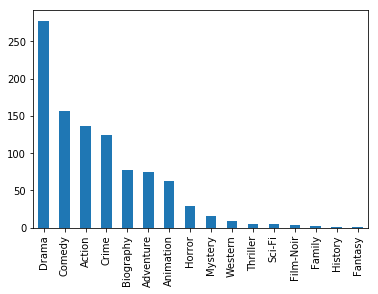

In [0]:
movies.genre.value_counts().plot(kind='bar')

In [0]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

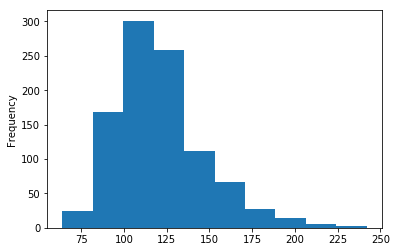

In [0]:
movies.duration.plot(kind="hist")

In [0]:
bo=[ ]
for long in movies.duration:
  if long >=200:
    bo.append(True)
  else:
    bo.append(False)
bo[0:9]
is_long=pd.Series(bo)
is_long.head()
movies[is_long]

In [0]:
is_long=movies.duration>=200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [0]:
movies[movies.duration>=200   ]['title']

2                             The Godfather: Part II
7      The Lord of the Rings: The Return of the King
17                                     Seven Samurai
78                       Once Upon a Time in America
85                                Lawrence of Arabia
142                Lagaan: Once Upon a Time in India
157                               Gone with the Wind
204                                          Ben-Hur
445                             The Ten Commandments
476                                           Hamlet
630                                        Malcolm X
767                  It's a Mad, Mad, Mad, Mad World
Name: title, dtype: object

In [0]:
movies.loc[(movies.duration>=200)  & (movies.genre=='Drama')]


,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [0]:
movies[movies.genre.isin(["Action","Drama"])]

In [0]:
drink=pd.read_csv("http://bit.ly/drinksbycountry")
drink.head( )
drink.drop('continent',axis=1).head()
drink.dtypes
drink ['beer_servings']= drink.beer_servings.astype(float)
drink.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [0]:
drink.describe()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [0]:
drink.describe().loc['mean','beer_servings']

106.16062176165804

In [0]:
drink.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [0]:
drink.index

RangeIndex(start=0, stop=193, step=1)

In [0]:
drink.drop(2,axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [0]:
drink.set_index('country',inplace=True)
drink.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0,0,0.0,Asia
Albania,89.0,132,54,4.9,Europe
Algeria,25.0,0,14,0.7,Africa
Andorra,245.0,138,312,12.4,Europe
Angola,217.0,57,45,5.9,Africa


In [0]:
drink.loc['Brazil','beer_servings']

245.0

In [0]:
drink.continent.value_counts()['Africa']

53

In [0]:
drink.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [0]:
drink.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [0]:
people=pd.Series([3000000,85000],index=["Albania","Andorra"],name="pop")
people

Albania    3000000
Andorra      85000
Name: pop, dtype: int64

In [0]:
drink.beer_servings * people

In [0]:
pd.concat([drink,people],axis=1).head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,pop
Afghanistan,0.0,0,0,0.0,Asia,NaN
Albania,89.0,132,54,4.9,Europe,3000000.0
Algeria,25.0,0,14,0.7,Africa,NaN
Andorra,245.0,138,312,12.4,Europe,85000.0
Angola,217.0,57,45,5.9,Africa,NaN


In [0]:
drink.continent.head()


country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [0]:
drink.mean(axis=1)

In [0]:
drink.groupby("continent").beer_servings.agg(['count','mean','min','max'])


,count,mean,min,max
continent,,,,
Africa,53,61.471698,0.0,376.0
Asia,44,37.045455,0.0,247.0
Europe,45,193.777778,0.0,361.0
North America,23,145.434783,1.0,285.0
Oceania,16,89.687500,0.0,306.0
South America,12,175.083333,93.0,333.0


In [0]:
drink.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


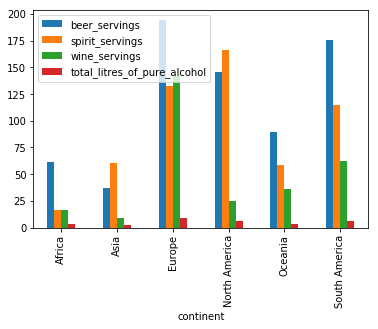

In [0]:
%matplotlib inline
drink.groupby("continent").mean().plot(kind='bar')

In [0]:
drink[drink.continent=='Asia'].beer_servings.agg(['count','mean','min','max'])

count     44.000000
mean      37.045455
min        0.000000
max      247.000000
Name: beer_servings, dtype: float64